In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [3]:
G = 6.67e-8
g = 4.0/3.0
k = 1.244e15*(0.5**g)
o_r = 2.0e8

def euler(n):
    dr = o_r/n
    
    # Set up variables
    
    r = np.zeros(n)
    rho = np.zeros(n)
    mass = np.zeros(n)
    press = np.zeros(n)
    
    # Set up central values (initial values)
    
    r[0] = 0
    rho[0] = 10.0e10
    mass[0] = 0.0
    press[0] = k*rho[0]**g
    press_c = 10.0e-10*press[0]

    for i in range(1,n):
        
        r[i] = dr * i
        mass[i] = 4.0*pi*r[i]**2 * (press[i-1]/k)**(1/g) * dr + mass[i-1]
        press[i] = -((G*mass[i-1])/(r[i]**2))*((press[i-1]/k)**(1/g)) * dr + press[i-1]
        rho[i] = (press[i]/k)**(1/g)
        
        if press[i] < press_c:
           break
    return(r,rho,mass,press)

euler(1000)

[       0.   200000.   400000.   600000.   800000.  1000000.  1200000.
  1400000.  1600000.  1800000.  2000000.  2200000.  2400000.  2600000.
  2800000.  3000000.  3200000.  3400000.  3600000.  3800000.  4000000.
  4200000.  4400000.  4600000.  4800000.  5000000.  5200000.  5400000.
  5600000.  5800000.  6000000.  6200000.  6400000.  6600000.  6800000.
  7000000.  7200000.  7400000.  7600000.  7800000.  8000000.  8200000.
  8400000.  8600000.  8800000.  9000000.  9200000.  9400000.  9600000.
  9800000. 10000000. 10200000. 10400000. 10600000. 10800000. 11000000.
 11200000. 11400000. 11600000. 11800000. 12000000. 12200000. 12400000.
 12600000. 12800000. 13000000. 13200000. 13400000. 13600000. 13800000.
 14000000. 14200000. 14400000. 14600000. 14800000. 15000000. 15200000.
 15400000. 15600000. 15800000. 16000000. 16200000. 16400000. 16600000.
 16800000. 17000000. 17200000. 17400000. 17600000. 17800000. 18000000.
 18200000. 18400000. 18600000. 18800000. 19000000. 19200000. 19400000.
 19600

(array([       0.,   200000.,   400000.,   600000.,   800000.,  1000000.,
         1200000.,  1400000.,  1600000.,  1800000.,  2000000.,  2200000.,
         2400000.,  2600000.,  2800000.,  3000000.,  3200000.,  3400000.,
         3600000.,  3800000.,  4000000.,  4200000.,  4400000.,  4600000.,
         4800000.,  5000000.,  5200000.,  5400000.,  5600000.,  5800000.,
         6000000.,  6200000.,  6400000.,  6600000.,  6800000.,  7000000.,
         7200000.,  7400000.,  7600000.,  7800000.,  8000000.,  8200000.,
         8400000.,  8600000.,  8800000.,  9000000.,  9200000.,  9400000.,
         9600000.,  9800000., 10000000., 10200000., 10400000., 10600000.,
        10800000., 11000000., 11200000., 11400000., 11600000., 11800000.,
        12000000., 12200000., 12400000., 12600000., 12800000., 13000000.,
        13200000., 13400000., 13600000., 13800000., 14000000., 14200000.,
        14400000., 14600000., 14800000., 15000000., 15200000., 15400000.,
        15600000., 15800000., 16000000

[0.00000000e+00 1.00530965e+28 5.02654825e+28 1.40718528e+29
 3.01425892e+29 5.52289974e+29 9.13058428e+29 1.40328098e+30
 2.04226678e+30 2.84904241e+30 3.84231076e+30 5.04041084e+30
 6.46127880e+30 8.12241008e+30 1.00408231e+31 1.22330241e+31
 1.47149744e+31 1.75020582e+31 2.06090531e+31 2.40501025e+31
 2.78386890e+31 3.19876114e+31 3.65089621e+31 4.14141083e+31
 4.67136740e+31 5.24175248e+31 5.85347553e+31 6.50736781e+31
 7.20418153e+31 7.94458923e+31 8.72918337e+31 9.55847615e+31
 1.04328995e+32 1.13528055e+32 1.23184664e+32 1.33300757e+32
 1.43877489e+32 1.54915243e+32 1.66413643e+32 1.78371570e+32
 1.90787174e+32 2.03657891e+32 2.16980464e+32 2.30750961e+32
 2.44964793e+32 2.59616740e+32 2.74700973e+32 2.90211076e+32
 3.06140072e+32 3.22480446e+32 3.39224175e+32 3.56362752e+32
 3.73887213e+32 3.91788162e+32 4.10055803e+32 4.28679964e+32
 4.47650126e+32 4.66955449e+32 4.86584801e+32 5.06526785e+32
 5.26769764e+32 5.47301891e+32 5.68111130e+32 5.89185287e+32
 6.10512033e+32 6.320789

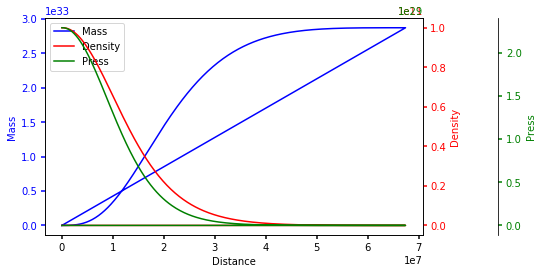

In [3]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=1)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(euler(1000)[0],euler(1000)[2], "b-", label="Mass")
p2, = par1.plot(euler(1000)[0],euler(1000)[1] , "r-", label="Density")
p3, = par2.plot(euler(1000)[0],euler(1000)[3] , "g-", label="Press")


host.set_xlabel("Distance")
host.set_ylabel("Mass")
par1.set_ylabel("Density")
par2.set_ylabel("Press")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()